In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# COVID 5 Stars Review

In [29]:
covid_5stars=pd.read_csv('/content/drive/MyDrive/high_covid_rev.csv')
covid_5stars.columns
covid_5stars=covid_5stars.drop(columns=['Unnamed: 0'])
covid_5stars.head()

,stars,text
0,5,"Fantastic as usual! Great, unique burgers tha..."
1,5,We ordered the Shrimp burger and the NY strip ...
2,5,"The Butcher Cut burger was very tasty, beef pa..."
3,5,"OMG, FLIP Burger Boutique was certainly magnif..."
4,5,We've always loved eating here. Their food is ...


In [30]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [36]:
yelp_text_5stars = covid_5stars.copy()
yelp_text_5stars['text'] = yelp_text_5stars['text'].apply(remove_punc_stopword)
yelp_text_5stars.count()

stars    81843
text     81843
dtype: int64

In [33]:
yelp_text_5stars

,stars,text
0,5,"Fantastic as usual! Great, unique burgers tha..."
1,5,We ordered the Shrimp burger and the NY strip ...
2,5,"The Butcher Cut burger was very tasty, beef pa..."
3,5,"OMG, FLIP Burger Boutique was certainly magnif..."
4,5,We've always loved eating here. Their food is ...
...,...,...
81838,5,The owner of this restaurant is a great guy so...
81839,5,My wife and her family are originally from Cin...
81840,5,A little taste of home! Born and raised in Cin...
81841,5,The best (and only) chili company in town. I ...


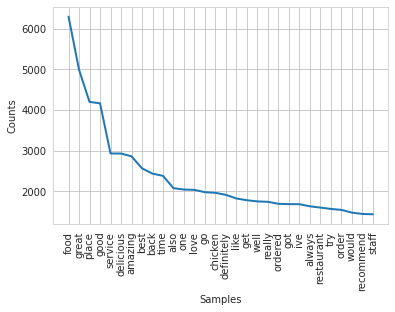

In [37]:
words_split = []
for i in range(0,9999): 
    for word in yelp_text_5stars['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

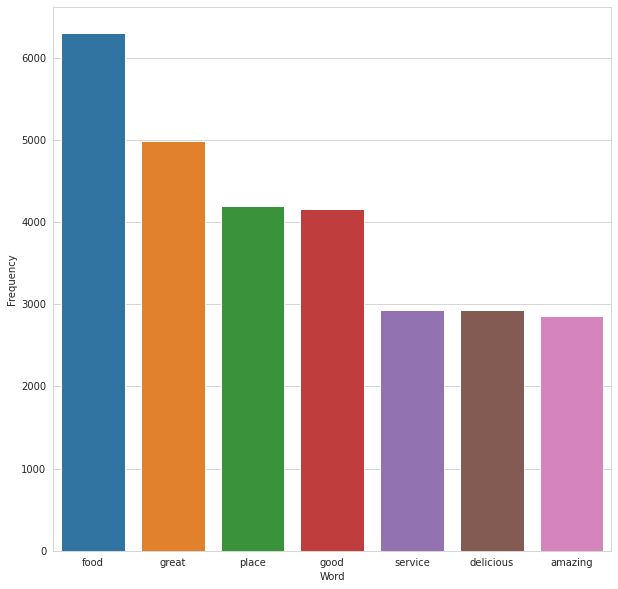

In [38]:
top_N = 7
word_dist = nltk.FreqDist(words_split)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

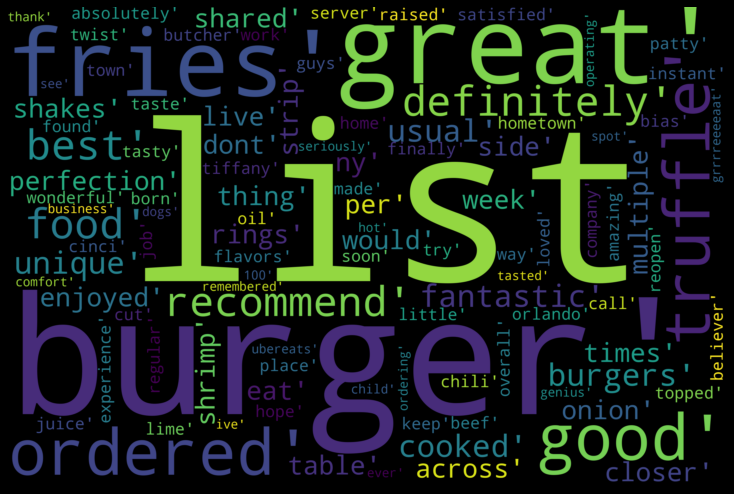

In [39]:
yelp_5stars_text = yelp_text_5stars['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_5stars_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

#COVID 1 STARS REVIEW

In [14]:
covid_1stars= pd.read_csv("/content/drive/MyDrive/covid_1_stars.csv")
covid_1stars

,Unnamed: 0,stars,text
0,1694,1,It's really hard for me to leave a bad review....
1,1748,1,Went last night for dinner and didn't stay lon...
2,1765,1,I wanted to try this place b/c there were tons...
3,1880,1,I was craving a burger but didn't feel like d...
4,1943,1,NO. Absolutely the worst service ever. This pl...
...,...,...,...
19034,2574577,1,If you want to find a bagel one step above Ein...
19035,2574579,1,"As a native from NJ, I was disappointed.\n\nCa..."
19036,2574585,1,"Just stopped by Biderman's to grab a bagel. ""..."
19037,2574610,1,"""We called and texted"" no text, but they gave ..."


In [15]:
yelp_text_1stars = covid_1stars.copy()
yelp_text_1stars['text'] = yelp_text_1stars['text'].apply(remove_punc_stopword)
yelp_text_1stars.count()

Unnamed: 0    19039
stars         19039
text          19039
dtype: int64

In [16]:
yelp_text_1stars

,Unnamed: 0,stars,text
0,1694,1,"[really, hard, leave, bad, review, think, ive,..."
1,1748,1,"[went, last, night, dinner, didnt, stay, longe..."
2,1765,1,"[wanted, try, place, bc, tons, reviews, 45, st..."
3,1880,1,"[craving, burger, didnt, feel, like, driving, ..."
4,1943,1,"[absolutely, worst, service, ever, place, sign..."
...,...,...,...
19034,2574577,1,"[want, find, bagel, one, step, einsteins, plac..."
19035,2574579,1,"[native, nj, disappointed, came, lunch, would,..."
19036,2574585,1,"[stopped, bidermans, grab, bagel, toasted, bag..."
19037,2574610,1,"[called, texted, text, gave, reservation, away..."


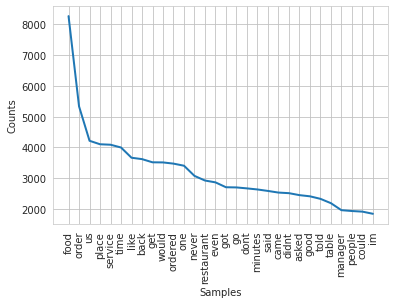

In [18]:
words_split = []
for i in range(0,9999): 
    for word in yelp_text_1stars['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

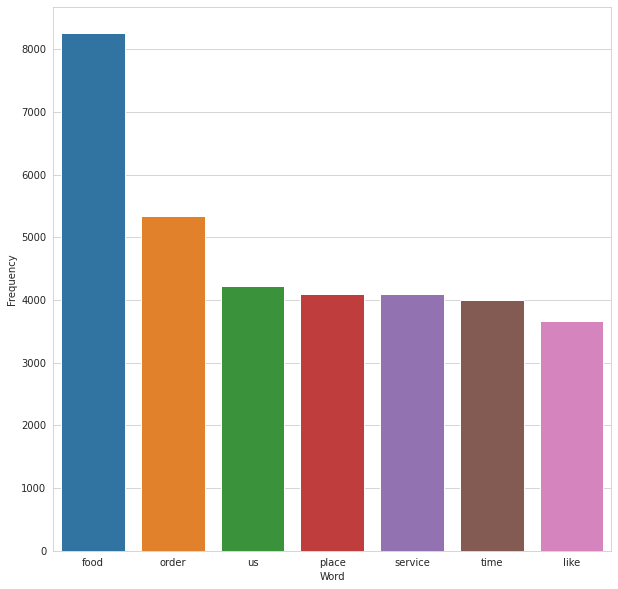

In [19]:
top_N = 7
word_dist = nltk.FreqDist(words_split)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

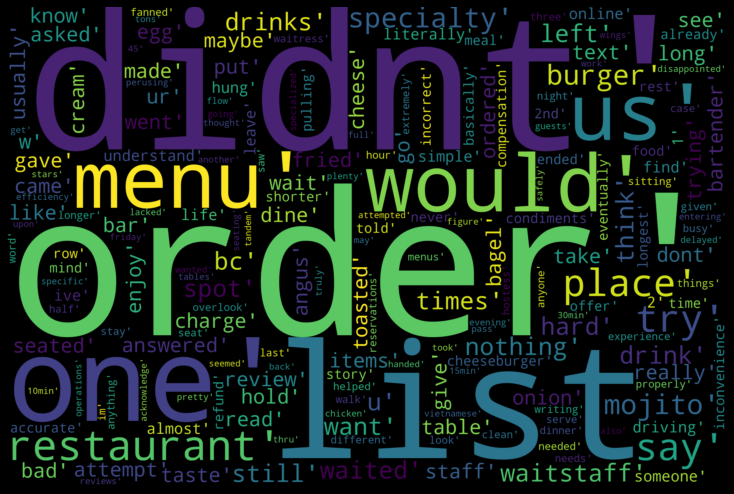

In [40]:
yelp_1stars_text = yelp_text_1stars['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_1stars_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# Sentiment and Polarity

In [24]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=yelp_text_1stars['text'].astype(str)

In [25]:
for row in df_review_str[:100]:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])

In [26]:
df_polarity_desc 

,Review,sentiment,polarity
0,"['really', 'hard', 'leave', 'bad', 'review', '...",-0.171970,0.378680
1,"['went', 'last', 'night', 'dinner', 'didnt', '...",-0.056250,0.322917
2,"['wanted', 'try', 'place', 'bc', 'tons', 'revi...",0.130870,0.520663
3,"['craving', 'burger', 'didnt', 'feel', 'like',...",0.018182,0.625758
4,"['absolutely', 'worst', 'service', 'ever', 'pl...",-0.181250,0.510417
...,...,...,...
95,"['idea', 'good', 'ramen', 'know', 'would', 'le...",0.650000,0.748148
96,"['bland', 'chewy', 'expensive', 'ugh', 'chicke...",-0.233333,0.456410
97,"['hike', 'really', 'wanted', 'something', 'war...",-0.031378,0.490986
98,"['restaurant', 'bad', 'waiting', 'ordered', 'r...",-0.223810,0.466667


In [27]:
df_review_str=yelp_text_5stars['text'].astype(str)
for row in df_review_str[:100]:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])

In [28]:
df_polarity_desc

,Review,sentiment,polarity
0,"['really', 'hard', 'leave', 'bad', 'review', '...",-0.171970,0.378680
1,"['went', 'last', 'night', 'dinner', 'didnt', '...",-0.056250,0.322917
2,"['wanted', 'try', 'place', 'bc', 'tons', 'revi...",0.130870,0.520663
3,"['craving', 'burger', 'didnt', 'feel', 'like',...",0.018182,0.625758
4,"['absolutely', 'worst', 'service', 'ever', 'pl...",-0.181250,0.510417
...,...,...,...
195,"['one', 'favorite', 'places', 'international',...",0.280000,0.670000
196,"['millers', 'ale', 'house', 'fanatics', 'frequ...",0.096875,0.467014
197,"['im', 'obsessed', 'millers', 'ale', 'house', ...",0.419444,0.640385
198,"['whole', 'group', 'enjoyed', 'food', 'drinks'...",0.500000,0.616667
